Author : Nelson Vithayathil Varghese

This is the Natural Language Processing (NLP) model implementation file for the Named Entity Recogniztion (NER) Task . 


I would be adding the comments at each step to reflect the entire thought process that I have followed during the develpment of this model 

**Brief note on Named-entity recognition (NER)**

Named-entity recognition (NER) (also known in another names such as named entity identification,token classification or entity extraction) can be treated as a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc. From a Machine Learning's perspective, I view  it as supersvised learning,multi-class classfication problem where each class denotes the various entities that are mentioned above.Here the data source is an unstructured text

**NER NLP Model Design Approach**

In order to develop this model, I would be adopting a Deep Learning oriented approach wherein  the state-of-the-art method of Transfer Learning with Transformers would be employed.As per my understanding, this method has two key steps: pre-training followed by fine-tuning. 

Firstly use a pre-trained language model  such as (Transformer stack namely BERT)  that was trained on the large corpus of textual data (from a source like wikipedia),then subsequently training this model on the custom dataset used for this specific problem( Kaggle Dataset named Annotated Corpus for Named Entity Recognition(Datasetfile name: ner_dataset.csv) ) and specialize / tune it for the given NER task.

As stated above, I would be using pre-trained Transformer encoder( BERT) model from the Hugging face



In [1]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [2]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 4.2 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 4.0 MB 40.0 MB/s 
     |████████████████████████████████| 10.1 MB 36.0 MB/s 
     |████████████████████████████████| 1.8 MB 17.5 MB/s 
     |████████████████████████████████| 6.6 MB 33.0 MB/s 
     |████████████████████████████████| 1.2 MB 31.5 MB/s 
     |████████████████████████████████| 325 kB 27.0 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 895 kB 34.3 MB/s 
     |████████████████████████████████| 596 kB 38.3 MB/s 
     |████████████████████████████████| 144 kB 28.7 MB/s 
     |████████████████████████████████| 181 kB 43.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 136 kB 33.4 MB/s 
     |████████████████████████████████| 212 kB 31.6 MB/s 
     |████████████████████████████████| 1.1 MB 43.7 MB/s 
     |██████████████

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

# Obtain the data

I am using a helper function that can be used from both colab / Jupyter notebook environment to fetch the data into a Pandas dataframe for further analysis

In [4]:
# Helper funtion for reading the csv dataset file and generating the dataframe
def load_dataset(file_name):
    
    data_path = os.path.join(os.getcwd(),file_name)
#     return pd.read_excel(data_path,index_col = 0)
    return pd.read_csv(data_path,encoding='latin1')

In [5]:
df_data = load_dataset('ner_dataset.csv')
df_data.head(27)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


# Exploratory Data Analysis(EDA)

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [7]:
df_data.columns

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

In [8]:
df_data['Tag'].nunique()

17

In [9]:
# Named Entity Values ( Label / Ground Truth Values)
tags = df_data['Tag'].unique()
pd.DataFrame(data=tags,columns=['Named Entities[Label Values]'])

,Named Entities[Label Values]
0,O
1,B-geo
2,B-gpe
3,B-per
4,I-geo
5,B-org
6,I-org
7,B-tim
8,B-art
9,I-art


In [10]:
# Similar kind of analysis for the POS ( Parts Of Speach column)
tags = df_data['POS'].unique()
pd.DataFrame(data=tags,columns=['Parts Of Speach Values'])

,Parts Of Speach Values
0,NNS
1,IN
2,VBP
3,VBN
4,NNP
5,TO
6,VB
7,DT
8,NN
9,CC


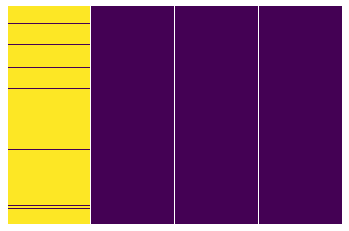

In [11]:
# Visually check for any missing / null values
sns.heatmap(df_data.isnull(),xticklabels=False,yticklabels=False,cbar = False,cmap='viridis')

# Preprocessing

In [12]:
# Sentence column has NaN values for the words other than teh first word of a sentence in Sentence #
df_data.loc[:,'Sentence #'] = df_data['Sentence #'].fillna(method='ffill')

In [13]:
df_data.head(27)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


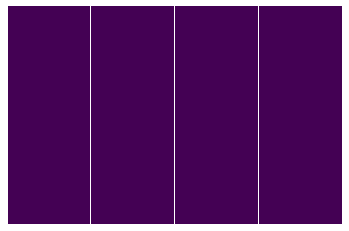

In [14]:
# Visually check for any missing / null values
sns.heatmap(df_data.isnull(),xticklabels=False,yticklabels=False,cbar = False,cmap='viridis')

In [15]:
df_data['Sentence #'].unique()

array(['Sentence: 1', 'Sentence: 2', 'Sentence: 3', ...,
       'Sentence: 47957', 'Sentence: 47958', 'Sentence: 47959'],
      dtype=object)

In [16]:
# Sentence column names ( Ex. Sentence 1) for each statement needs to be converted a numerical column 
# before building the model
from sklearn.preprocessing import LabelEncoder

In [17]:
df_data['Sentence #'] = LabelEncoder().fit_transform(df_data['Sentence #'] )

In [18]:
df_model_data = df_data.drop('POS', axis=1)

In [19]:
# For better readability 
df_model_data.rename(columns={'Sentence #':'sentence_id','Word':'words','Tag':'labels'}, inplace =True)

In [20]:
df_model_data.columns

Index(['sentence_id', 'words', 'labels'], dtype='object')

In [21]:
X = df_model_data.drop('labels',axis=1)

In [22]:
y = df_model_data['labels']

# Model Building

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
# model_train_data frame
model_train_data = pd.DataFrame({'sentence_id':X_train['sentence_id'],'words':X_train['words'],'labels':y_train})

In [26]:
# model_test_data frame
model_test_data = pd.DataFrame({'sentence_id':X_test['sentence_id'],'words':X_test['words'],'labels':y_test})

In [27]:
from simpletransformers.ner import NERModel,NERArgs

In [28]:
# Get the list of all the unique NER Tags from the dataset
labels = df_data['Tag'].unique().tolist()
# Changing it to uppercase for better readability
# labels = [label.upper() for label in labels]
# labels

In [29]:
args = NERArgs()
args.num_train_epochs = 2
args.learning_rate = 1e-4
args.overwrite_output_dir =True
args.train_batch_size = 32
args.eval_batch_size = 32

In [30]:
import torch
cuda_available = torch.cuda.is_available()
cuda_available

True

In [31]:
model = NERModel('bert', 'bert-base-cased',labels=labels,args=args,use_cuda=cuda_available)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
model.train_model(model_train_data,eval_data = model_test_data,acc=accuracy_score)

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1499 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 2:   0%|          | 0/1499 [00:00<?, ?it/s]

(2998, 0.15963482542374757)

In [34]:
result, model_outputs, wrong_preds = model.eval_model(model_test_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1460 [00:00<?, ?it/s]

In [35]:
result

{'eval_loss': 0.17866967902901545,
 'f1_score': 0.7939343718926085,
 'precision': 0.8213771346272547,
 'recall': 0.7682660850599782}

In [67]:
prediction, model_output = model.predict(['Ottawa is the capital of Canada and Justin Trudeau is the prime minister'])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
prediction

[[{'Ottawa': 'B-geo'},
  {'is': 'O'},
  {'the': 'O'},
  {'capital': 'O'},
  {'of': 'O'},
  {'Canada': 'B-geo'},
  {'and': 'O'},
  {'Justin': 'B-per'},
  {'Trudeau': 'I-per'},
  {'is': 'O'},
  {'the': 'O'},
  {'prime': 'O'},
  {'minister': 'O'}]]

In [65]:
prediction, model_output = model.predict(['Messi is a football player and he lives in France','Cristiano Ronaldo lives in London'])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
prediction

[[{'Messi': 'B-per'},
  {'is': 'O'},
  {'a': 'O'},
  {'football': 'O'},
  {'player': 'O'},
  {'and': 'O'},
  {'he': 'O'},
  {'lives': 'O'},
  {'in': 'O'},
  {'France': 'B-geo'}],
 [{'Cristiano': 'I-per'},
  {'Ronaldo': 'B-per'},
  {'lives': 'O'},
  {'in': 'O'},
  {'London': 'B-geo'}]]